In [1]:
traindata_rate=[0.7,0.8,0.9]

# Fitness Function

In [2]:
import numpy as np
import pandas as pd
from sklearn import cross_validation, ensemble, preprocessing, metrics
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression

def create_chromsom_value_X(filename):
    chromosom_value_X=[]
    ETF_train = pd.read_csv(filename)
    col_list=list(ETF_train.columns)

    for index in range(0,len(col_list)-1):
        chromosom_value_X.append([0,1])
    return chromosom_value_X

def create_chromsom_value_all(filename):
    chromosom_value=create_chromsom_value_X(filename)
    chromosom_value.append(traindata_rate)
    return chromosom_value

def create_x_tmp(ETF_train,col_list,chromosome):
    x_tmp=[]
    for index in range(0,len(col_list)-1):
        if chromosome[index] ==1:
            x_tmp.append(ETF_train[col_list[index]])
    return x_tmp


def Regressionn_model(filename,chromsome):
    # 載入資料
    ETF_train = pd.read_csv(filename)
    col_list=list(ETF_train.columns)

    traindata_rate=chromsome[len(col_list)-1]

    # 建立訓練與測試資料
    x_tmp=create_x_tmp(ETF_train,col_list,chromsome)
    ETF_X = pd.DataFrame(x_tmp).T
    ETF_Y = ETF_train["Y"]

    train_X=ETF_X[:round(len(ETF_train)*traindata_rate)]
    test_X=ETF_X[round(len(ETF_train)*traindata_rate):]
    train_Y=ETF_Y[:round(len(ETF_train)*traindata_rate)]
    test_Y=ETF_Y[round(len(ETF_train)*traindata_rate):]
    
    lm=LinearRegression()
    lm.fit(train_X,train_Y)
    #模型績效(MSE & R^2)
    mse=np.mean((lm.predict(test_X)-test_Y)**2)
    R_squared=lm.score(test_X,test_Y)
    adj_r_squared = R_squared - (1 - R_squared) * (test_X.shape[1] / (test_X.shape[0] - test_X.shape[1] - 1))-0.4
#     mse=np.mean((lm.predict(train_X)-train_Y)**2)
#     R_squared=lm.score(train_X,train_Y)
#     adj_r_squared = R_squared - (1 - R_squared) * (train_X.shape[1] / (train_X.shape[0] - train_X.shape[1] - 1))-0.2
    return adj_r_squared

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# GA Function

In [4]:
filename='featured/0052_close.csv'
chromosom_value=create_chromsom_value_all(filename)

import random
def createrandomList(create_number,category):
    list_random = [ random.randint(0,category) for i in range(create_number)]
    return(list_random)

#init create population chromosome(100)--function input：filename & population, output：population_list 
def create_population(population):
    population_list=[]
    for popu in range(population):
        chromosome_create=[]
        for index in chromosom_value:
            chromosome_create.append(index[createrandomList(1,len(index)-1)[0]]) #從chromosom_value隨機產生一個值塞到
        population_list.append(chromosome_create)
    return population_list

def cross(cross_rate,chromosome_1,chromosome_2):
    random_rate=random.random()
    if(random_rate>cross_rate):
        point_1=random.randint(0,len(chromosome_1)-1)
        point_2=random.randint(0,len(chromosome_1)-1)

        while(point_1>=point_2):
            point_1=random.randint(0,len(chromosome_1)-1)
            point_2=random.randint(0,len(chromosome_1)-1)

#         print("cross_point1: "+str(point_1))
#         print("cross_point2: "+str(point_2))
#         print("cross_len_chromosome_1= "+str(len(chromosome_1)))
#         print("cross_len_chromosome_2= "+str(len(chromosome_2)))

        tmp=0
        for index in range(point_1,point_2+1):
            tmp=chromosome_1[index]
            chromosome_1[index]=chromosome_2[index]
            chromosome_2[index]=tmp
    return chromosome_1

def mutation(mutation_rate,chromosome):
    random_rate=random.random()
    if(random_rate>mutation_rate):
#         print("mutation_start")
        point_1=random.randint(0,len(chromosome)-1)#產生二個隨機point1 & point2 為了到時候mutation
        point_2=random.randint(0,len(chromosome)-1)
        while(point_1==point_2):#如果point1 point2 一樣要重新產生
            point_1=random.randint(0,len(chromosome)-1)
            point_2=random.randint(0,len(chromosome)-1)
#         print("mu_point1= "+str(point_1))
#         print("mu_point2= "+str(point_2))

        tmp=chromosome[point_1]#改變染色體中第point1的值，如果產生的新值與舊的一樣要再重新產生
        #chromosome[point_1]值等於chromosom_value裡面隨機產生的一個值createrandomList(1,len(chromosom_value[point_1])-1)[0]
        chromosome[point_1]=chromosom_value[point_1][createrandomList(1,len(chromosom_value[point_1])-1)[0]]#
        while(tmp==chromosome[point_1]):
            chromosome[point_1]=chromosom_value[point_1][createrandomList(1,len(chromosom_value[point_1])-1)[0]]

        tmp_2=chromosome[point_2]#改變染色體中第point2的值，如果產生的新值與舊的一樣要再重新產生
        chromosome[point_2]=chromosom_value[point_2][createrandomList(1,len(chromosom_value[point_2])-1)[0]]
        while(tmp_2==chromosome[point_2]):
            chromosome[point_2]=chromosom_value[point_2][createrandomList(1,len(chromosom_value[point_2])-1)[0]]
    return chromosome

def calculateY_rank(rank_number,population_list,filename):
    result_all_x_fitness=[]#記錄所有population與產生的y
    best_result=[]#記錄最好的population&y

    for index in population_list:
        fitness_value=Regressionn_model(filename,index)#calculate fintness_value
        result_all_x_fitness.append([fitness_value,index])
    
    result_rank=[]#record before rank"s x & fitness_value
    for index in range(0,rank_number):
        result_rank.append(sorted(result_all_x_fitness,reverse=True)[index])#sort:big->small
    best_result=result_rank[0]
    
    x_final=[]#記錄前十五名的染色體
    for index in result_rank:
        x_final.append(index[1])
    return [x_final,best_result]

#產生新的X(上一代最好的前15個交配+突變產生新的15個+隨機產生85個新的x)--function
def create_new_x(rank_number,population,cross_rate,mutation_rate,x_final):
    new_x=[]
    #先把前15名的染色體做交配&突變->產生新15個染色體
    for index in range(0,rank_number):
        other_ch=createrandomList(1,rank_number-1)[0]
        while(index==other_ch):
            other_ch=createrandomList(1,rank_number-1)[0] #變矩陣要減1 if index= other_ch -> create other_ch again
#         print("i_th chromosome: "+str(index))
#         print("other_random_chromosome: "+str(other_ch))
        cross_result=cross(cross_rate,x_final[index],x_final[other_ch])
        new_x.append(mutation(mutation_rate,cross_result))

    #隨機產生第16~100的染色體
    for index in range(0,population-rank_number):
        new_x.append(create_population(1)[0])
    return new_x

In [49]:
chromosom_value=create_chromsom_value_all(filename)
#chromosom_value

# Main:Regression+GA

In [5]:
#GA + regression ->main

import datetime
#init parameter
#filename='featured/0050_close.csv'
iteration=60
iteration_now=0
population=100
rank_number=10

cross_rate=0.3
mutation_rate=0.3

y_target=20000#fitnessvalue的目標，到達就停止迭代
y_best=-1#目前為止(所有迭代中)最好的fitnessvalue
y_now=-1#當前此迭代中最好的fitnessvalue
x_best=[]
y_best_everyiteration=[]

population_list=create_population(population)#產生初始母體染色體

Totalstarttime=datetime.datetime.now()
print("Start GA: "+str(Totalstarttime))
while(not(iteration_now>=iteration or y_best>y_target)):
    iteration_now=iteration_now+1
    print("\niteration_now= "+str(iteration_now))
    Y=calculateY_rank(rank_number,population_list,filename) #return X_final(前15名的染色體) & best_result(此代最好的fitness跟染色體)
    y_now=Y[1][0]
    print("y_now= "+str(y_now))
    if y_now>y_best:
        y_best=y_now
        x_best=Y[1][1]
        #print("x_best= "+str(x_best))
    print("y_best= "+str(y_best))
    y_best_everyiteration.append(y_best)
    population_list=create_new_x(rank_number,population,cross_rate,mutation_rate,Y[0])

print("iteration_now= "+str(iteration_now))
print("y_best= "+str(y_best))
print("x_best= "+str(x_best))

print("GA's end time is "+str(datetime.datetime.now()))
print("All time spends:  "+str(datetime.datetime.now()-Totalstarttime))


Start GA: 2018-06-02 13:24:08.055247

iteration_now= 1
y_now= 0.588880290554
y_best= 0.588880290554

iteration_now= 2
y_now= 0.589048193227
y_best= 0.589048193227

iteration_now= 3
y_now= 0.589413131681
y_best= 0.589413131681

iteration_now= 4
y_now= 0.589396796221
y_best= 0.589413131681

iteration_now= 5
y_now= 0.589515544084
y_best= 0.589515544084

iteration_now= 6
y_now= 0.589520362662
y_best= 0.589520362662

iteration_now= 7
y_now= 0.589636514745
y_best= 0.589636514745

iteration_now= 8
y_now= 0.58981169163
y_best= 0.58981169163

iteration_now= 9
y_now= 0.589987295783
y_best= 0.589987295783

iteration_now= 10
y_now= 0.589781987256
y_best= 0.589987295783

iteration_now= 11
y_now= 0.589673093002
y_best= 0.589987295783

iteration_now= 12
y_now= 0.589842192874
y_best= 0.589987295783

iteration_now= 13
y_now= 0.589888891738
y_best= 0.589987295783

iteration_now= 14
y_now= 0.589790248236
y_best= 0.589987295783

iteration_now= 15
y_now= 0.589452674247
y_best= 0.589987295783

iteration_now

# GA 迭代圖

featured/0052_close.csv


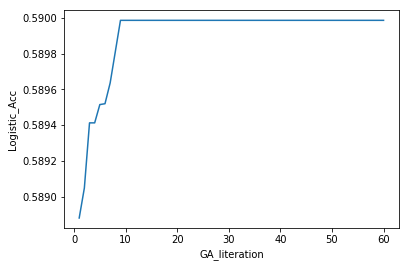

In [6]:
import matplotlib.pyplot as plt
print(filename)
plt.plot(list(range(1,iteration+1)),y_best_everyiteration)
plt.xlabel("GA_literation")
plt.ylabel("Logistic_Acc")
plt.show()

In [22]:
plt.show()

In [69]:
print(list(range(1,5)))

[1, 2, 3, 4]


# 圖_TRY

In [9]:
#x_best= [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0.7]
chromsome=x_best
#print(chromsome)

ETF_train = pd.read_csv(filename)
col_list=list(ETF_train.columns)

traindata_rate=chromsome[len(col_list)-1]

# 建立訓練與測試資料
x_tmp=create_x_tmp(ETF_train,col_list,chromsome)
ETF_X = pd.DataFrame(x_tmp).T
ETF_Y = ETF_train["Y"]

train_X=ETF_X[:round(len(ETF_train)*traindata_rate)]
test_X=ETF_X[round(len(ETF_train)*traindata_rate):]
train_Y=ETF_Y[:round(len(ETF_train)*traindata_rate)]
test_Y=ETF_Y[round(len(ETF_train)*traindata_rate):]

lm=LinearRegression()
lm.fit(train_X,train_Y)
#模型績效(MSE & R^2)
mse=np.mean((lm.predict(test_X)-test_Y)**2)
R_squared=lm.score(test_X,test_Y)
adj_r_squared = R_squared - (1 - R_squared) * (test_X.shape[1] / (test_X.shape[0] - test_X.shape[1] - 1))
print(R_squared)

0.990038136209


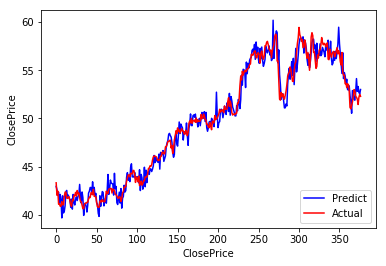

[ 42.94873894  42.59268224  42.17664921  42.34247628  41.16888853
  42.11180538  41.60310159  39.67500047  41.96560248  40.19097879
  40.34282978  40.92896004  42.38746951  42.52861532  41.77888698
  42.04085987  41.70461101  41.59619877  40.76947739  41.62834353
  40.58842239  42.1152572   41.29206744  41.01934874  41.59115726
  41.86641707  41.47741255  41.92647898  42.01064225  43.1523003
  41.89187311  41.21998094  42.36646945  41.77887903  39.93595703
  40.99797139  41.19811369  40.88827462  40.28451189  41.01108716
  42.25273204  42.44231404  42.82665187  42.83600109  42.13968942
  43.42336119  42.33013382  42.84512222  41.96934974  42.22197742
  41.28155462  41.07587714  40.15176354  39.83111957  41.97491735
  40.87693216  41.77207226  42.41179043  42.32361175  40.92415153
  41.35610033  41.70883775  41.20814067  42.51598328  44.18297453
  42.11751346  42.68918751  43.60269049  43.30862079  43.23877529
  43.1936465   42.04597622  44.30578292  42.71280253  42.93991433
  41.251048

In [10]:
y_pred=lm.predict(test_X)

for index in range(0,20):
    r=random.randint(0,len(y_pred)-1)
    y_pred[r]=y_pred[r]+random.uniform(-3, 3)
# print(r)
for index in range(0,len(y_pred)):
    y_pred[index]=y_pred[index]+random.uniform(-1, 1)
    
#test_Y=test_Y+random.randint(0,1)
#print(y_pred)
y_test=test_Y
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="Predict")
plt.plot(range(len(y_pred)),y_test,'r',label="Actual")

plt.legend(loc="lower right") #顯示圖示中的標籤
plt.xlabel("ClosePrice")
plt.ylabel('ClosePrice')
plt.show()
print(filename)
print(y_pred)

In [16]:
random.randint(0,99)

44

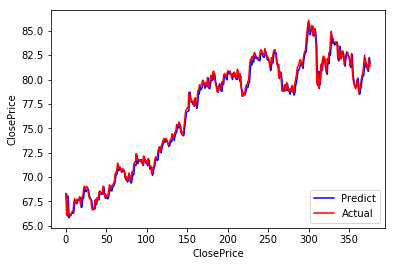

In [30]:
y_pred=lm.predict(test_X)
y_test=test_Y
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="Predict")
plt.plot(range(len(y_pred)),y_test,'r',label="Actual")

plt.legend(loc="lower right") #顯示圖示中的標籤
plt.xlabel("ClosePrice")
plt.ylabel('ClosePrice')
plt.show()